# Exploratory Data Analysis on credit loans.


The analysis include

*   Exploration and verification fo data quality. A total of 76587 was used to build a mdoel (4.2% row values were eliminated due to missing data or inconsistencies as outliers on specific relevant variables)
*   The credit maturity was explored to define the dependent variable later. Maturity is defined in terms of months with the loan and pct of loan status within the mo of antiquity.
*    New variables were build such a grouping in the purpose variable to asses imbalanced classes, at the same time geographical information was explored into groups ith high risk, for this kmeans was used. Later categorical and continuos variables were transformed by WoEs.



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the input

In [ ]:
path = '/content/drive/MyDrive/USA/NinjaHoldings/Assesment/'

In [ ]:
## Reading the dictionary

datadictionary = pd.read_excel(path+'data_dictionary.csv.xlsx')
datadictionary[['variable','Description','For model']]

variable                                        Description  \
0                       id         A unique assigned ID for the loan listing.   
1                loan_amnt  The listed amount of the loan applied for by t...   
2                     term  The number of payments on the loan. Values are...   
3              installment  The monthly payment owed by the borrower if th...   
4               emp_length  Employment length in years. Possible values ar...   
5           home_ownership  The home ownership status provided by the borr...   
6               annual_inc  The self-reported annual income provided by th...   
7      verification_status  Indicates if income was verified, not verified...   
8                  issue_d                The month which the loan was funded   
9              loan_status                         Current status of the loan   
10                 purpose  A category provided by the borrower for the lo...   
11              addr_state  The state provided by the borrower in the loan...   
12                     dti  A ratio calculated using the borroweres total ...   
13        earliest_cr_line  The month the borrower's earliest reported cre...   
14          fico_range_low  At the time of loan application, the lower bou...   
15         fico_range_high  At the time of loan application, the upper bou...   
16          acc_now_delinq  At the time of loan application, the number of...   
17             delinq_amnt  At the time of loan application, the past-due ...   
18             delinq_2yrs  At the time of loan application, the number of...   
19  mths_since_last_delinq  At the time of loan application, the number of...   
20  mths_since_last_record  At the time of loan application, the number of...   
21          inq_last_6mths  At the time of loan application, the number of...   
22            inq_last_12m  At the time of loan application, number of cre...   
23      last_credit_pull_d  The most recent month LC pulled credit for thi...   
24    last_fico_range_high  The upper boundary range the borrower's last F...   
25     last_fico_range_low  The lower boundary range the borrower's last F...   

   For model  
0         no  
1        yes  
2        yes  
3         no  
4        yes  
5        yes  
6        yes  
7        yes  
8         no  
9         no  
10       yes  
11       yes  
12      yes?  
13       yes  
14       yes  
15       yes  
16       yes  
17       yes  
18       yes  
19       yes  
20       yes  
21       yes  
22       yes  
23       yes  
24       yes  
25       yes

In [ ]:
#Reading the main file from Google drive
creditloans = pd.read_csv(path+'data.csv')
creditloans.head(5)

id  loan_amnt       term  installment emp_length home_ownership  \
0  88787390      30000  60 months      761.640    6 years           RENT   
1  74722660      30000  60 months      692.930  10+ years       MORTGAGE   
2  67919555      16000  60 months      379.390    6 years           RENT   
3  54027458      14000  36 months      439.880    5 years           RENT   
4  72594974       7500  36 months      252.670    3 years       MORTGAGE   

   annual_inc verification_status   issue_d loan_status  ...  \
0  100100.000            Verified  Sep-2016     Current  ...   
1  235000.000     Source Verified  Apr-2016     Current  ...   
2   84000.000        Not Verified  Jan-2016     Current  ...   
3   50000.000     Source Verified  Jul-2015  Fully Paid  ...   
4   68000.000        Not Verified  Feb-2016  Fully Paid  ...   

  last_credit_pull_d last_fico_range_high  last_fico_range_low acc_now_delinq  \
0           Dec-2016                  709                  705              0   
1           Dec-2016                  649                  645              0   
2           Dec-2016                  739                  735              0   
3           Oct-2016                  749                  745              0   
4           Dec-2016                  709                  705              0   

   delinq_amnt  delinq_2yrs mths_since_last_delinq  mths_since_last_record  \
0            0            0                 26.000                     NaN   
1            0            1                 16.000                     NaN   
2            0            0                 80.000                     NaN   
3            0            0                    NaN                  42.000   
4            0            0                    NaN                     NaN   

   inq_last_6mths  inq_last_12m  
0               0         0.000  
1               1         3.000  
2               0         2.000  
3               0           NaN  
4               2         5.000  

[5 rows x 26 columns]

In [ ]:
len(creditloans), len(set(creditloans['id'].values)) #unique credit id, this is just the snapsh

(80000, 80000)

Maria's thought: it could be good to have the historical information on monthly payments so then the objective variable to define default can be refined as binary or multiclass based on patterns of deliquency. For example, Regulators and industry standards have established certain delinquency thresholds, such as the 90-day mark, to provide a consistent and standardized way to assess the creditworthiness and financial health of borrowers.

Neverless, criterias change in terms of the business requirements and having the mark on default here lead me to continue going on a binary classification as the first approach.

## Exploration data analysis

In [ ]:
null_counts = creditloans.isnull().sum().reset_index()
print("Number of null values in each column:\n", null_counts)

Number of null values in each column:
                      index      0
0                       id      0
1                loan_amnt      0
2                     term      0
3              installment      0
4               emp_length   4869
5           home_ownership      0
6               annual_inc      0
7      verification_status      0
8                  issue_d      0
9              loan_status      0
10                 purpose      0
11              addr_state      0
12                     dti      0
13        earliest_cr_line      0
14          fico_range_low      0
15         fico_range_high      0
16      last_credit_pull_d      4
17    last_fico_range_high      0
18     last_fico_range_low      0
19          acc_now_delinq      0
20             delinq_amnt      0
21             delinq_2yrs      0
22  mths_since_last_delinq  38214
23  mths_since_last_record  65468
24          inq_last_6mths      0
25            inq_last_12m  42605


In [ ]:
#get the non missing last_credit_pull_d
creditloans=creditloans[~creditloans['last_credit_pull_d'].isnull()]
len(creditloans)

79996

In [ ]:
import pandas as pd
import sys

##providing a general data exploration

pd.set_option('display.float_format', lambda x: '%.2f' % x)


with open(path+'outputs/datadescription.txt', 'w') as file:
    # Redirect standard output to the file
    sys.stdout = file

    column_types = creditloans.dtypes

    # Iterate over columns and perform operations based on data type
    for column_name, dtype in column_types.iteritems():
        if 'id' not in column_name:
            print(f"============================================================================================================== ")
            print(f"Column: {column_name}, Type: {dtype} is {datadictionary[datadictionary['variable']==column_name]['Description'].values[0]}")
            print(f"==============================================================================================================")

            if dtype == 'object':
                # Perform operations specific to object (string) columns

                print('Categorical ', column_name,'--- \n', creditloans.groupby(column_name)['id'].count()/800, ' %')
                print(f"Nulls {null_counts[null_counts['index']==column_name][0].values[0]/800} %")

            else:
                # Handle other data types
                print(creditloans[column_name].describe(percentiles=[.05,.25, .5, .75, .9, .95, .99]))

                print(f"Nulls: {null_counts[null_counts['index']==column_name][0].values[0]/800} %")

    # Reset standard output to the console
    sys.stdout = sys.__stdout__
{}

<ipython-input-11-fb2d0a8b3b67>:16: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, dtype in column_types.iteritems():


{}

In [ ]:
#creditloans['annual_inc'].describe()
import plotly.express as px
import pandas as pd

for var in ['loan_amnt','annual_inc','acc_now_delinq',
          'delinq_amnt',
          'delinq_2yrs',
          'mths_since_last_delinq',
          'mths_since_last_record', 'inq_last_6mths',
          'inq_last_12m']:
  #var='annual_inc'
  # Create a histogram with Plotly Express

  fig = px.histogram(creditloans, x=var, title=f'Distribution of {var}')
  fig.show()
  print(creditloans[var].describe()) #this variable has outliers
  creditloans[var] = creditloans[var].fillna(-1) #-1 is the special value for missings in this case

count    79995.000000
mean     15055.280018
std       8728.998554
min       1000.000000
25%       8000.000000
50%      13275.000000
75%      20000.000000
max      40000.000000
Name: loan_amnt, dtype: float64


count    7.999500e+04
mean     7.778846e+04
std      8.648786e+04
min      0.000000e+00
25%      4.700000e+04
50%      6.500000e+04
75%      9.250000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64


count    79995.000000
mean         0.006488
std          0.084237
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: acc_now_delinq, dtype: float64


count     79995.000000
mean         16.693068
std         848.316143
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      110626.000000
Name: delinq_amnt, dtype: float64


count    79995.00000
mean         0.35226
std          0.94243
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max         39.00000
Name: delinq_2yrs, dtype: float64


count    41783.000000
mean        33.965177
std         21.997721
min          0.000000
25%         15.000000
50%         31.000000
75%         50.000000
max        146.000000
Name: mths_since_last_delinq, dtype: float64


count    14529.000000
mean        66.779682
std         25.202025
min          0.000000
25%         50.000000
50%         68.000000
75%         83.000000
max        119.000000
Name: mths_since_last_record, dtype: float64


count    79995.000000
mean         0.565948
std          0.863346
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: inq_last_6mths, dtype: float64


count    37392.000000
mean         2.184023
std          2.474035
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         36.000000
Name: inq_last_12m, dtype: float64


**Questions:** mths_since_last_record missing in big percentage, is a data entry issue? inq_last_12m missing means no credit inquiries or not report? is that consistent with mths_since_last_record?

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [ ]:
creditloans.groupby(['emp_length']).count()

id  loan_amnt   term  installment  home_ownership  annual_inc  \
emp_length                                                                     
-1           4187       4187   4187         4187            4187        4187   
1 year       5108       5108   5108         5108            5108        5108   
10+ years   25971      25971  25971        25971           25971       25971   
2 years      6978       6978   6978         6978            6978        6978   
3 years      6080       6080   6080         6080            6080        6080   
4 years      4554       4554   4554         4554            4554        4554   
5 years      4550       4550   4550         4550            4550        4550   
6 years      3186       3186   3186         3186            3186        3186   
7 years      2904       2904   2904         2904            2904        2904   
8 years      3747       3747   3747         3747            3747        3747   
9 years      3086       3086   3086         3086            3086        3086   
< 1 year     5942       5942   5942         5942            5942        5942   

            verification_status  issue_d  loan_status  purpose  ...  \
emp_length                                                      ...   
-1                         4187     4187         4187     4187  ...   
1 year                     5108     5108         5108     5108  ...   
10+ years                 25971    25971        25971    25971  ...   
2 years                    6978     6978         6978     6978  ...   
3 years                    6080     6080         6080     6080  ...   
4 years                    4554     4554         4554     4554  ...   
5 years                    4550     4550         4550     4550  ...   
6 years                    3186     3186         3186     3186  ...   
7 years                    2904     2904         2904     2904  ...   
8 years                    3747     3747         3747     3747  ...   
9 years                    3086     3086         3086     3086  ...   
< 1 year                   5942     5942         5942     5942  ...   

            mths_since_last_delinq  mths_since_last_record  inq_last_6mths  \
emp_length                                                                   
-1                            2099                    1070            4187   
1 year                        2578                     778            5108   
10+ years                    14338                    4934           25971   
2 years                       3445                    1116            6978   
3 years                       3121                    1023            6080   
4 years                       2332                     828            4554   
5 years                       2374                     852            4550   
6 years                       1705                     611            3186   
7 years                       1495                     569            2904   
8 years                       1931                     660            3747   
9 years                       1589                     518            3086   
< 1 year                      2908                     946            5942   

            inq_last_12m   Date  earliest_cr_line_  last_credit_pull_d_  \
emp_length                                                                
-1                  2133   4187               4187                 4187   
1 year              2400   5108               5108                 5108   
10+ years          12219  25971              25971                25971   
2 years             3258   6978               6978                 6978   
3 years             2847   6080               6080                 6080   
4 years             2126   4554               4554                 4554   
5 years             2160   4550               4550                 4550   
6 years             1516   3186               3186                 3186   
7 years             1111   2904               2904      

In [ ]:
#id
#loan_amnt ok
#term ok
#installment ok

#emp_length filling missings with special value -1 to represent this scenario
creditloans['emp_length'] = creditloans['emp_length'].fillna('-1 years')

#home_ownership
creditloans=creditloans[creditloans['home_ownership']!='ANY']
len(creditloans)


79995

In [ ]:
#annual_inc
p2=np.percentile(creditloans['annual_inc'],2)
p98=np.percentile(creditloans['annual_inc'],100-2)
print('p2', p2, 'p98:', p98)
creditloans=creditloans[creditloans['annual_inc'].between(p2, p98)]
len(creditloans)

#delinq_amnt
t='delinq_amnt'
p2=np.percentile(creditloans[t],2)
p98=np.percentile(creditloans[t],100-2)
print('for ', t, 'the percentile 2', p2, 'nd 98 ',p98)
creditloans=creditloans[creditloans[t].between(p2, p98)]
len(creditloans)



76587

In [ ]:
#verification_status ok

#issue_d
#last_credit_pull_d
#earliest_cr_line
from datetime import datetime

#transofrming to dates
creditloans['Date'] = pd.to_datetime(creditloans['issue_d'], format='%b-%Y')
creditloans['earliest_cr_line_'] = pd.to_datetime(creditloans['earliest_cr_line'], format='%b-%Y')
creditloans['last_credit_pull_d_'] = pd.to_datetime(creditloans['last_credit_pull_d'], format='%b-%Y')
len(creditloans)

76587

In [ ]:
creditloans=creditloans[creditloans['Date']<creditloans['last_credit_pull_d_']]
len(creditloans)

76293

In [ ]:
import pandas as pd
from dateutil.relativedelta import relativedelta



#"loan_status" records the latest status as of 01/23/2017
end_date = datetime.strptime('01/23/2017', '%m/%d/%Y')

# Calculate the number of months between the loan was issued and the date of this snapshot in 01/23/2017
creditloans['months_with_cn_loan'] = ((end_date - creditloans['Date']) / 30).dt.days -1


creditloans['months_since_earliest_cr_line'] = ((creditloans['Date'] - creditloans['earliest_cr_line_']) / np.timedelta64(1, 'M')).astype(int)
#creditloans['months_last_credit_pull_d'] = ((creditloans['Date'] - creditloans['last_credit_pull_d_']) / np.timedelta64(1, 'M')).astype(int)


creditloans.head(5)

id  loan_amnt       term  installment emp_length home_ownership  \
0  88787390      30000  60 months      761.640    6 years           RENT   
2  67919555      16000  60 months      379.390    6 years           RENT   
3  54027458      14000  36 months      439.880    5 years           RENT   
4  72594974       7500  36 months      252.670    3 years       MORTGAGE   
5  74815224       2800  36 months       94.330   < 1 year           RENT   

   annual_inc verification_status   issue_d loan_status  ... delinq_2yrs  \
0  100100.000            Verified  Sep-2016     Current  ...           0   
2   84000.000        Not Verified  Jan-2016     Current  ...           0   
3   50000.000     Source Verified  Jul-2015  Fully Paid  ...           0   
4   68000.000        Not Verified  Feb-2016  Fully Paid  ...           0   
5   25000.000     Source Verified  Mar-2016     Current  ...           1   

  mths_since_last_delinq  mths_since_last_record inq_last_6mths  inq_last_12m  \
0                 26.000                     NaN              0         0.000   
2                 80.000                     NaN              0         2.000   
3                    NaN                  42.000              0           NaN   
4                    NaN                     NaN              2         5.000   
5                 14.000                     NaN              0         0.000   

        Date earliest_cr_line_  last_credit_pull_d_  months_with_cn_loan  \
0 2016-09-01        1976-01-01           2016-12-01                    3   
2 2016-01-01        1998-08-01           2016-12-01                   11   
3 2015-07-01        1996-10-01           2016-10-01                   18   
4 2016-02-01        2000-11-01           2016-12-01                   10   
5 2016-03-01        2006-12-01           2016-12-01                    9   

   months_since_earliest_cr_line  
0                            488  
2                            209  
3                            224  
4                            183  
5                            110  

[5 rows x 31 columns]

#### **NOTES:**

---
*   CONCLUSSIONS ON DATA:
 loan_status ok
 purpose has different values, needed to analyze in terms of the default rate within group and between groups
 addr_state OK
 dti OK
 fico_range_low OK
 fico_range_high OK
 last_fico_range_high OK
 last_fico_range_low OK
 acc_now_delinq is cero in 95% of the cases, wont be a good predictive variable
 delinq_amnt as the last one
 delinq_2yrs as the last one
 mths_since_last_delinq 40% missings, not sure if no information available or is a default 0 value, many ways to interpet missings eg no data available, system error on request, etc
 mths_since_last_record 80%missings, same thoughts as the last one
 inq_last_6mths ok
 inq_last_12m 50% missings

---
*   DEFINING THE DEFAULTER/OBJETIVE VARIABLE
'loan_status', Default=1, otherwise non default, check the maturity of credits
'issue_d', take the months until the snapshot of this data

---
*   POTENTIAL PREDICTIVE VARIABLES
'loan_amnt', no missings, can be used as it is info captured at the moment of the loan request
'term', can be used in the model, is kind balanced
'emp_length', turn into categorical later
'home_ownership', well balanced
'annual_inc',
'verification_status', looks balanced 3 cats
'purpose', to many categories, looks like declarative, debt consolidation and credit card looks similar on its interpretation, also the more frequent
'addr_state', many categories, correlate with default rates and check if any geographical cluster to reduce dimentionality
'dti',
'earliest_cr_line', turn into months
'fico_range_low',
'fico_range_high',
'last_credit_pull_d',turn into months to issue_d
'last_fico_range_high',
'last_fico_range_low',
'acc_now_delinq',
'delinq_amnt',
'delinq_2yrs',
'mths_since_last_delinq'
'inq_last_6mths',
'inq_last_12m',

In [ ]:
import pandas as pd

# Mapping dictionary
mapping_dict = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
    None: -1 # Handle missing values if needed
}

# Map the variable to ordinal values, '1 is an special value for missings so it can be identified latter
creditloans['employment_length_ordinal'] = creditloans['emp_length'].apply(lambda x:
                                                              mapping_dict[str(x)] if '-1' not in str(x) else -1)

In [ ]:
# Display the result
creditloans.groupby(['emp_length', 'employment_length_ordinal'])['id'].count()

emp_length  employment_length_ordinal
-1 years    -1                            4187
1 year       1                            5108
10+ years    10                          25971
2 years      2                            6978
3 years      3                            6080
4 years      4                            4554
5 years      5                            4550
6 years      6                            3186
7 years      7                            2904
8 years      8                            3747
9 years      9                            3086
< 1 year     0                            5942
Name: id, dtype: int64

In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# my file
parquet_file_path = path+'outputs/datainput1.parquet'

# Write DataFrame to Parquet file
pq.write_table(pa.Table.from_pandas(creditloans), parquet_file_path)


In [ ]:
import pandas as pd
import pyarrow.parquet as pq


parquet_file_path = path+'outputs/datainput1.parquet'

# Read Parquet file into a pandas DataFrame
creditloans = pd.read_parquet(parquet_file_path, engine='pyarrow')

len(creditloans)

76293

In [ ]:
len(creditloans.columns)

32

# Objective Variable

#### Check

In [ ]:
#Check
creditloans[['issue_d','Date','last_credit_pull_d','last_credit_pull_d_','earliest_cr_line_']].head(5)

issue_d       Date last_credit_pull_d last_credit_pull_d_  \
0  Sep-2016 2016-09-01           Dec-2016          2016-12-01   
2  Jan-2016 2016-01-01           Dec-2016          2016-12-01   
3  Jul-2015 2015-07-01           Oct-2016          2016-10-01   
4  Feb-2016 2016-02-01           Dec-2016          2016-12-01   
5  Mar-2016 2016-03-01           Dec-2016          2016-12-01   

  earliest_cr_line_  
0        1976-01-01  
2        1998-08-01  
3        1996-10-01  
4        2000-11-01  
5        2006-12-01

In [ ]:
len(creditloans[creditloans['Date']<creditloans['earliest_cr_line_']])

0

In [ ]:
len(creditloans[creditloans['Date']<creditloans['last_credit_pull_d_']])

76293

## Credit maturity

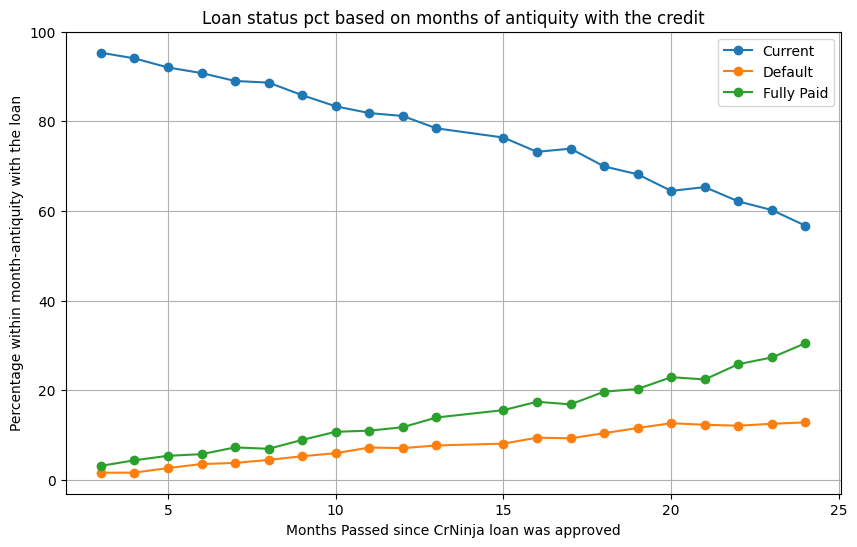

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the total count of IDs for each combination of "months_passed" and "loan_status"
grouped_data = creditloans.groupby(["months_with_cn_loan", "loan_status"])["id"].count().reset_index(name='count')

# Create a pivot table with percentages
pivot_table = pd.pivot_table(grouped_data, values='count', index='months_with_cn_loan', columns='loan_status', fill_value=0)

# Calculate the percentage for each "loan_status" within each "months_passed"
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

df=pivot_table_percentage.reset_index()


# Plot the lines
plt.figure(figsize=(10, 6))
plt.plot(df['months_with_cn_loan'], df['Current'], label='Current', marker='o')
plt.plot(df['months_with_cn_loan'], df['Default'], label='Default', marker='o')
plt.plot(df['months_with_cn_loan'], df['Fully Paid'], label='Fully Paid', marker='o')

# Add labels and title
plt.xlabel('Months Passed since CrNinja loan was approved')
plt.ylabel('Percentage within month-antiquity with the loan')
plt.title('Loan status pct based on months of antiquity with the credit')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


In [ ]:
pivot_table_percentage

loan_status          Current  Default  Fully Paid
months_with_cn_loan                              
3                     95.327    1.569       3.104
4                     94.069    1.585       4.345
5                     92.034    2.617       5.349
6                     90.785    3.505       5.710
7                     89.023    3.756       7.221
8                     88.653    4.434       6.913
9                     85.856    5.248       8.896
10                    83.358    5.933      10.709
11                    81.859    7.184      10.957
12                    81.202    7.066      11.732
13                    78.448    7.654      13.898
15                    76.390    8.065      15.545
16                    73.202    9.392      17.406
17                    73.918    9.250      16.832
18                    69.940   10.399      19.661
19                    68.188   11.552      20.260
20                    64.480   12.624      22.896
21                    65.334   12.273      22.392
22                    62.138   12.060      25.803
23                    60.205   12.500      27.295
24                    56.708   12.808      30.484

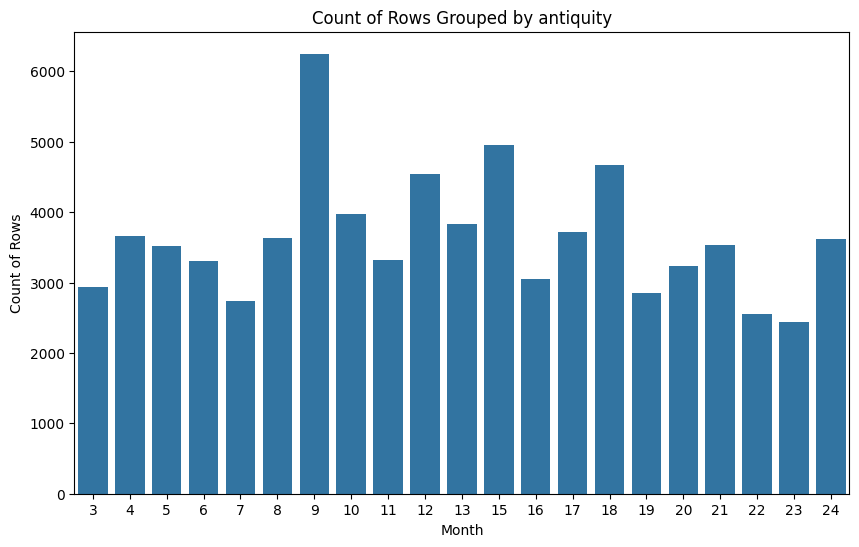

In [ ]:
#creditloans.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = creditloans

# Group by 'term' and 'month' and calculate counts
counts_df = df.groupby(['months_with_cn_loan']).size().reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='months_with_cn_loan', y='count', data=counts_df)
plt.title('Count of Rows Grouped by antiquity')
plt.xlabel('Month')
plt.ylabel('Count of Rows')
plt.show()


 **Maria thoughts** Looks like new borrowers (with less than 8 mo with the credit loan) pay good, in the sense that the default rate is low. The default rate increases for borrowers with more mo with the credit. Aditionally, possible changes on internal policies in the company caused an increase on the acceptance, that is originations increased in month 9th before jan 2017 (march 2016) N=6607.  

#### Check now by term

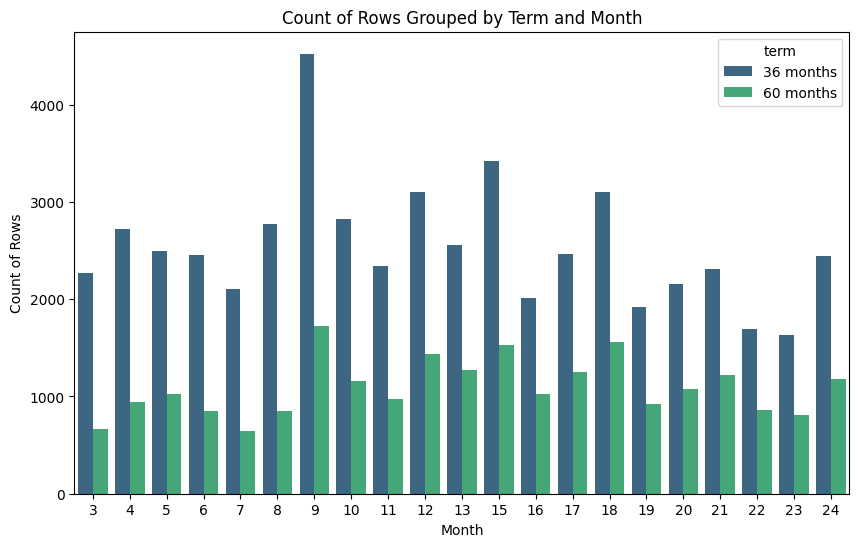

In [ ]:
#creditloans.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = creditloans

# Group by 'term' and 'month' and calculate counts
counts_df = df.groupby(['term', 'months_with_cn_loan']).size().reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='months_with_cn_loan', y='count', hue='term', data=counts_df, palette='viridis')
plt.title('Count of Rows Grouped by Term and Month')
plt.xlabel('Month')
plt.ylabel('Count of Rows')
plt.show()


In [ ]:
_60months=creditloans[creditloans['term'].str.contains('60')]
_30months=creditloans[creditloans['term'].str.contains('36')]

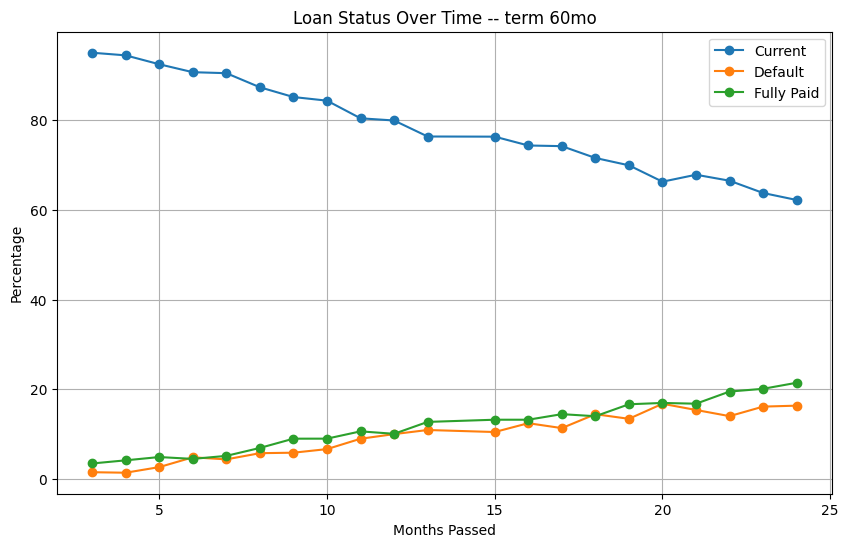

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Segment that will pay in 60 months
# Calculate the total count of IDs for each combination of "months_with_cn_loan" and "loan_status"
grouped_data = _60months.groupby(["months_with_cn_loan", "loan_status"])["id"].count().reset_index(name='count')

# Create a pivot table with percentages
pivot_table = pd.pivot_table(grouped_data, values='count', index='months_with_cn_loan', columns='loan_status', fill_value=0)

# Calculate the percentage for each "loan_status" within each "months_with_cn_loan"
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

df=pivot_table_percentage.reset_index()
df_60=df[['months_with_cn_loan','Default']]
df_60=df_60.rename(columns={'Default':'dr_term60'})

# Plot the lines
plt.figure(figsize=(10, 6))
plt.plot(df['months_with_cn_loan'], df['Current'], label='Current', marker='o')
plt.plot(df['months_with_cn_loan'], df['Default'], label='Default', marker='o')
plt.plot(df['months_with_cn_loan'], df['Fully Paid'], label='Fully Paid', marker='o')

# Add labels and title
plt.xlabel('Months Passed')
plt.ylabel('Percentage')
plt.title('Loan Status Over Time -- term 60mo')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


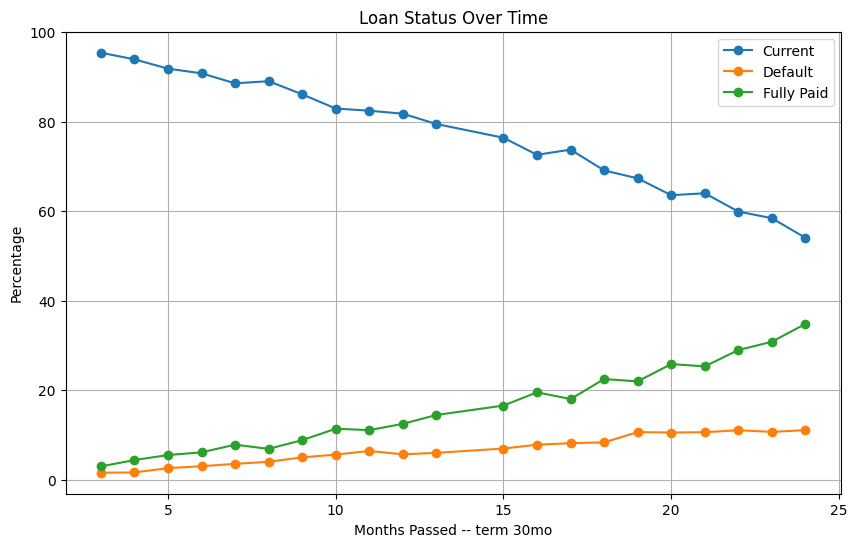

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Segment that will pay in 36 months
# Calculate the total count of IDs for each combination of "months_passed" and "loan_status"
grouped_data = _30months.groupby(["months_with_cn_loan", "loan_status"])["id"].count().reset_index(name='count')

# Create a pivot table with percentages
pivot_table = pd.pivot_table(grouped_data, values='count', index='months_with_cn_loan', columns='loan_status', fill_value=0)

# Calculate the percentage for each "loan_status" within each "months_passed"
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

df=pivot_table_percentage.reset_index()
df_36=df[['months_with_cn_loan','Default']]
df_36=df_36.rename(columns={'Default':'dr_term36'})
# Plot the lines
plt.figure(figsize=(10, 6))
plt.plot(df['months_with_cn_loan'], df['Current'], label='Current', marker='o')
plt.plot(df['months_with_cn_loan'], df['Default'], label='Default', marker='o')
plt.plot(df['months_with_cn_loan'], df['Fully Paid'], label='Fully Paid', marker='o')

# Add labels and title
plt.xlabel('Months Passed -- term 30mo')
plt.ylabel('Percentage')
plt.title('Loan Status Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


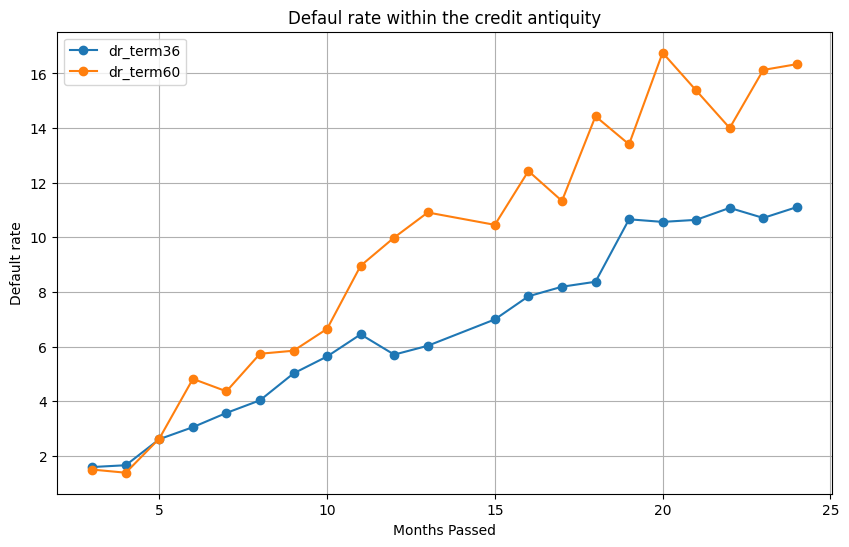

In [ ]:
## together

merging_defaults =df_36.merge(df_60, on='months_with_cn_loan', how='left')
df=merging_defaults

plt.figure(figsize=(10, 6))
plt.plot(df['months_with_cn_loan'], df['dr_term36'], label='dr_term36', marker='o')
plt.plot(df['months_with_cn_loan'], df['dr_term60'], label='dr_term60', marker='o')

# Add labels and title
plt.xlabel('Months Passed')
plt.ylabel('Default rate')
plt.title('Defaul rate within the credit antiquity')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [ ]:
creditloans.groupby(['term','loan_status'])['id'].count()

term       loan_status
36 months  Current        41775
           Default         3448
           Fully Paid      8093
60 months  Current        17904
           Default         2304
           Fully Paid      2769
Name: id, dtype: int64

In [ ]:
creditloans1=creditloans
creditloans1['label']=creditloans1['loan_status'].apply(lambda x: 1 if 'Default' in x else 0)

In [ ]:
import scipy.stats as stats


_60months=creditloans1[creditloans1['term'].str.contains('60')]
_36months=creditloans1[creditloans1['term'].str.contains('36')]

import scipy.stats as stats

data1_mean = _60months['label'].mean()
data2_mean = _36months['label'].mean()

n1 = len(_60months)
n2 = len(_36months)

var1 =_60months['label'].var()
var2 =_36months['label'].var()

# Perform a two-sample z-test
z_stat = (data1_mean - data2_mean) / ((var1/n1 + var2/n2)**0.5)
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))

print("z-statistic:", z_stat)
print("p-value:", p_value)


alpha = 0.05  # significance level
p_value #"Reject the null hypothesis. There is a significant difference between default rate on terms."

0.0

#### **CONCLUSSION**: In March 2016 an increase on acceptance was seen. The default rate also increased but the change was mainly for those on term 36mo, by the graphic above. The behavior on term 36mo vs 60mo on default looks that both should be treated separately or even including the variable in the model to asses the risk as an strategy for business.

In [ ]:
creditloans.head(5)

id  loan_amnt       term  installment emp_length home_ownership  \
0  88787390      30000  60 months       761.64    6 years           RENT   
2  67919555      16000  60 months       379.39    6 years           RENT   
3  54027458      14000  36 months       439.88    5 years           RENT   
4  72594974       7500  36 months       252.67    3 years       MORTGAGE   
5  74815224       2800  36 months        94.33   < 1 year           RENT   

   annual_inc verification_status   issue_d loan_status  ...  \
0    100100.0            Verified  Sep-2016     Current  ...   
2     84000.0        Not Verified  Jan-2016     Current  ...   
3     50000.0     Source Verified  Jul-2015  Fully Paid  ...   
4     68000.0        Not Verified  Feb-2016  Fully Paid  ...   
5     25000.0     Source Verified  Mar-2016     Current  ...   

  mths_since_last_delinq mths_since_last_record  inq_last_6mths inq_last_12m  \
0                   26.0                   -1.0               0          0.0   
2                   80.0                   -1.0               0          2.0   
3                   -1.0                   42.0               0         -1.0   
4                   -1.0                   -1.0               2          5.0   
5                   14.0                   -1.0               0          0.0   

   employment_length_ordinal       Date earliest_cr_line_  \
0                          6 2016-09-01        1976-01-01   
2                          6 2016-01-01        1998-08-01   
3                          5 2015-07-01        1996-10-01   
4                          3 2016-02-01        2000-11-01   
5                          0 2016-03-01        2006-12-01   

   last_credit_pull_d_  months_with_cn_loan  months_since_earliest_cr_line  
0           2016-12-01                    3                            488  
2           2016-12-01                   11                            209  
3           2016-10-01                   18                            224  
4           2016-12-01                   10                            183  
5           2016-12-01                    9                            110  

[5 rows x 32 columns]

QUESTION: if borrower did not pay in the last month, the credit is considered as lost or with a penalization? or after consecutive non payments?

In [ ]:
#Is 8 and 10 mo good? Wh
def labeling_defaulters(term, credit_antiquity, loan_status):

    if loan_status == 'Fully Paid':
        return 0
    if loan_status == 'Current':
        if credit_antiquity >= 1:
            return 0
        else:
            return -1 #'Indeterminated' not enough time to define them as non defaulters
    else:
        return 1#'Defaulter'



# Apply the function
creditloans['y'] = creditloans.apply(lambda row: labeling_defaulters(row['term'], row['months_with_cn_loan'], row['loan_status']), axis=1)
creditloans.groupby(['term'])['y'].mean()

term
36 months   0.065
60 months   0.100
Name: y, dtype: float64

In [ ]:
import pandas as pd



# Group by 'defaulter' and count the 'id' within each group
grouped_counts = creditloans.groupby('y')['id'].count()

# Calculate the percentage within each group
percentage_within_group = grouped_counts / grouped_counts.sum() * 100
percentage_within_group


y
0   92.461
1    7.539
Name: id, dtype: float64

In [ ]:
creditloans.dtypes

id                                        int64
loan_amnt                                 int64
term                                     object
installment                             float64
emp_length                               object
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                                  object
loan_status                              object
purpose                                  object
addr_state                               object
dti                                     float64
earliest_cr_line                         object
fico_range_low                            int64
fico_range_high                           int64
last_credit_pull_d                       object
last_fico_range_high                      int64
last_fico_range_low                       int64
acc_now_delinq                            int64
delinq_amnt                             

In [ ]:
null_counts = creditloans.isnull().sum().reset_index()
null_counts #"Number of null values in each column:\n",

index      0
0                              id      0
1                       loan_amnt      0
2                            term      0
3                     installment      0
4                      emp_length      0
5                  home_ownership      0
6                      annual_inc      0
7             verification_status      0
8                         issue_d      0
9                     loan_status      0
10                        purpose      0
11                     addr_state      0
12                            dti      0
13               earliest_cr_line      0
14                 fico_range_low      0
15                fico_range_high      0
16             last_credit_pull_d      0
17           last_fico_range_high      0
18            last_fico_range_low      0
19                 acc_now_delinq      0
20                    delinq_amnt      0
21                    delinq_2yrs      0
22         mths_since_last_delinq  36378
23         mths_since_last_record  62388
24                 inq_last_6mths      0
25                   inq_last_12m  40805
26                           Date      0
27              earliest_cr_line_      0
28            last_credit_pull_d_      0
29            months_with_cn_loan      0
30  months_since_earliest_cr_line      0
31      employment_length_ordinal      0
32                          label      0
33                              y      0

## Analyzing categorical variables

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
#purpose is declarative so lest see the predictive power but in general other variables that can be check could be better over this one
for x in ['term','home_ownership','verification_status','purpose','addr_state']:
  ml_input[x+'_encoded'] = ml_input.groupby(x)['y'].transform('mean')
  #ml_input[x+'_encoded'] = ml_input.groupby(x)['y'].transform('mean')
  # Create a contingency table
  grouped_counts = ml_input.groupby([x, 'y'])['id'].count()
  print(f"========= {x} =========  \n",grouped_counts)

  # Calculate the percentage of defaulters within each 'term' group
  percentage_within_term = grouped_counts / grouped_counts.groupby(x).transform('sum') * 100
  percentage_within_term=percentage_within_term.reset_index()

  # Display the result

  print(f" \n {percentage_within_term}")
  contingency_table = pd.crosstab(ml_input[x], ml_input['y'])

  # Perform the chi-square test
  chi2, p, _, _ = chi2_contingency(contingency_table)

  # Display the test results
  print(f"Chi-square statistic: {chi2}")
  print(f"P-value: {p}")

  # Interpret the results
  alpha = 0.05
  if p < alpha:
      print(f"Reject the null hypothesis: There is a statistically significant difference in default rates among {x} classes.")
  else:
      print(f"Fail to reject the null hypothesis: There is no statistically significant difference in default rates among {x} classes.")


<ipython-input-78-7956073066e9>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-7956073066e9>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-7956073066e9>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-78-7956073

========= term =========  
 term       y
36 months  0    49868
           1     3448
60 months  0    20673
           1     2304
Name: id, dtype: int64
 
         term  y         id
0  36 months  0  93.532898
1  36 months  1   6.467102
2  60 months  0  89.972581
3  60 months  1  10.027419
Chi-square statistic: 291.4690139389408
P-value: 2.37943702770939e-65
Reject the null hypothesis: There is a statistically significant difference in default rates among term classes.
========= home_ownership =========  
 home_ownership  y
MORTGAGE        0    34905
                1     2491
OWN             0     8040
                1      663
RENT            0    27596
                1     2598
Name: id, dtype: int64
 
   home_ownership  y         id
0       MORTGAGE  0  93.338860
1       MORTGAGE  1   6.661140
2            OWN  0  92.381937
3            OWN  1   7.618063
4           RENT  0  91.395642
5           RENT  1   8.604358
Chi-square statistic: 90.58038955262667
P-value: 2.141501211006369

#### Geographical information

In [ ]:
pip install folium


In [ ]:
state_coordinates = {
    'WI': (44.500000, -89.500000),
    'WV': (39.000000, -80.500000),
    'VT': (44.000000, -72.699997),
    'TX': (31.000000, -100.000000),
    'SD': (44.500000, -100.000000),
    'RI': (41.742325, -71.742332),
    'OR': (44.000000, -120.500000),
    'NY': (43.000000, -75.000000),
    'NH': (44.000000, -71.500000),
    'NE': (41.500000, -100.000000),
    'KS': (38.500000, -98.000000),
    'MS': (33.000000, -90.000000),
    'IL': (40.000000, -89.000000),
    'DE': (39.000000, -75.500000),
    'CT': (41.599998, -72.699997),
    'AR': (34.799999, -92.199997),
    'IN': (40.273502, -86.126976),
    'MO': (38.573936, -92.603760),
    'FL': (27.994402, -81.760254),
    'NV': (39.876019, -117.224121),
    'ME': (45.367584, -68.972168),
    'MI': (44.182205, -84.506836),
    'GA': (33.247875, -83.441162),
    'HI': (19.741755, -155.844437),
    'AK': (66.160507, -153.369141),
    'TN': (35.860119, -86.660156),
    'VA': (37.926868, -78.024902),
    'NJ': (39.833851, -74.871826),
    'KY': (37.839333, -84.270020),
    'ND': (47.650589, -100.437012),
    'MN': (46.392410, -94.636230),
    'OK': (36.084621, -96.921387),
    'MT': (46.965260, -109.533691),
    'WA': (47.751076, -120.740135),
    'UT': (39.419220, -111.950684),
    'CO': (39.113014, -105.358887),
    'OH': (40.367474, -82.996216),
    'AL': (32.318230, -86.902298),
    'IA': (42.032974, -93.581543),
    'NM': (34.307144, -106.018066),
    'SC': (33.836082, -81.163727),
    'PA': (41.203323, -77.194527),
    'AZ': (34.048927, -111.093735),
    'MD': (39.045753, -76.641273),
    'MA': (42.407211, -71.382439),
    'CA': (36.778259, -119.417931),
    'ID': (44.068203, -114.742043),
    'WY': (43.075970, -107.290283),
    'NC': (35.782169, -80.793457),
    'LA': (30.391830, -92.329102),
    'DC': (38.8951,-77.0364)
}
df=creditloans
df['Lat']=df['addr_state'].apply(lambda x: state_coordinates[x][0])
df['Lon']=df['addr_state'].apply(lambda x: state_coordinates[x][-1])

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Sample data


a=df.groupby('addr_state')['y'].describe().reset_index()
a.sort_values('mean')[['addr_state','count','mean']]

coord = a
coord=coord.rename(columns={'mean':'defrte_geog'})
# K-Means clustering based on 'mean'
X = coord[['defrte_geog']]
kmeans = KMeans(n_clusters=3, random_state=42)
coord['geo_cluster'] = kmeans.fit_predict(X)
coord['geo_cluster']=coord['geo_cluster']+1



# Display the result
coord[['addr_state','count', 'defrte_geog',  'geo_cluster']].sort_values('defrte_geog')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


addr_state     count  defrte_geog  geo_cluster
12         ID   100.000        0.030            2
20         ME   185.000        0.032            2
27         ND   116.000        0.034            2
45         VT   173.000        0.046            2
0          AK   162.000        0.049            2
29         NH   378.000        0.050            2
47         WI   991.000        0.050            2
36         OR   816.000        0.051            2
15         KS   667.000        0.057            2
40         SD   149.000        0.060            1
39         SC   918.000        0.061            1
28         NE   293.000        0.061            1
7          DC   190.000        0.063            1
13         IL  3035.000        0.064            1
10         GA  2496.000        0.064            1
48         WV   310.000        0.065            1
6          CT  1142.000        0.065            1
46         WA  1613.000        0.065            1
23         MO  1216.000        0.066            1
43         UT   538.000        0.067            1
14         IN  1343.000        0.067            1
49         WY   162.000        0.068            1
11         HI   360.000        0.069            1
5          CO  1647.000        0.071            1
21         MI  2101.000        0.071            1
34         OH  2612.000        0.072            1
16         KY   706.000        0.072            1
37         PA  2630.000        0.073            1
18         MA  1738.000        0.074            1
42         TX  6383.000        0.074            1
9          FL  5366.000        0.076            1
44         VA  2201.000        0.077            1
3          AZ  1764.000        0.078            1
22         MN  1364.000        0.078            1
30         NJ  2708.000        0.079            1
4          CA 10413.000        0.079            1
24         MS   492.000        0.079            1
8          DE   239.000        0.079            1
38         RI   333.000        0.081            1
31         NM   431.000        0.081            1
19         MD  1758.000        0.081            1
41         TN  1243.000        0.082            1
33         NY  6224.000        0.087            3
25         MT   205.000        0.088            3
26         NC  2168.000        0.088            3
32         NV  1079.000        0.089            3
17         LA   903.000        0.097            3
35         OK   708.000        0.102            3
1          AL   921.000        0.104            3
2          AR   603.000        0.109            3

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans

# Sample data

a=df.groupby('purpose')['y'].describe().reset_index()
a.sort_values('mean')[['purpose','count','mean']]
purp = a

# K-Means clustering based on 'mean'
X = purp[['mean']]
kmeans = KMeans(n_clusters=2, random_state=42)
purp['p_cluster'] = kmeans.fit_predict(X)

# Define geographical clusters
geo_clusters = {0: 'C1', 1: 'C2'}  # You can customize these clusters based on geography

# Map 'mean_cluster' to geographical clusters
#purp['purpose_cluster'] = purp['p_cluster'].map(geo_clusters)

# Display the result
purp[['purpose','count', 'mean', 'p_cluster']].sort_values('mean')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


purpose     count  mean  p_cluster
12             wedding     1.000 0.000          0
1          credit_card 17622.000 0.059          0
0                  car   714.000 0.063          0
3     home_improvement  4719.000 0.066          0
5       major_purchase  1544.000 0.076          0
6              medical   780.000 0.077          0
11            vacation   480.000 0.077          0
7               moving   494.000 0.079          0
8                other  4073.000 0.081          0
2   debt_consolidation 44807.000 0.081          0
10      small_business   708.000 0.110          1
4                house   303.000 0.112          1
9     renewable_energy    48.000 0.167          1

In [ ]:

emp=df.groupby('emp_length')['y'].describe().reset_index()
emp.sort_values('mean')[['emp_length','count','mean']]

# K-Means clustering based on 'mean'
X = emp[['mean']]
kmeans = KMeans(n_clusters=3, random_state=42)
emp['emp_length_cluster'] = kmeans.fit_predict(X)


# Map 'mean_cluster' to geographical clusters
#purp['purpose_cluster'] = purp['p_cluster'].map(geo_clusters)

# Display the result
emp[['emp_length','count', 'mean', 'emp_length_cluster']].sort_values('mean')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


emp_length     count  mean  emp_length_cluster
2   10+ years 25971.000 0.069                   2
7     6 years  3186.000 0.074                   0
6     5 years  4550.000 0.074                   0
9     8 years  3747.000 0.074                   0
5     4 years  4554.000 0.076                   0
4     3 years  6080.000 0.077                   0
3     2 years  6978.000 0.078                   0
8     7 years  2904.000 0.079                   1
10    9 years  3086.000 0.081                   1
0    -1 years  4187.000 0.082                   1
1      1 year  5108.000 0.082                   1
11   < 1 year  5942.000 0.087                   1

In [ ]:
#mergin geocluster
df1=creditloans.merge(coord[['addr_state','defrte_geog', 'geo_cluster']], on='addr_state', how='left')
df1[['id','addr_state','defrte_geog', 'geo_cluster']].head(5)

id addr_state  defrte_geog  geo_cluster
0  88787390         SC        0.061            1
1  67919555         FL        0.076            1
2  54027458         WV        0.065            1
3  72594974         OH        0.072            1
4  74815224         VT        0.046            2

In [ ]:
#judgement on class meaning, at the same time grouping the popular ones relatives to debt such as credit eg credit card and debt consolidation
def purpose_similarities(x):
  if x in ['credit_card']:
    return 'cc'
  elif 'consolida' in x:
    return 'debt'
  else:
    return 'others'

df2=df1
df2['purpose_class']=df2['purpose'].apply(lambda x: purpose_similarities(x))


In [ ]:
df2.groupby(['purpose_class','purpose'])['y'].describe()

count  mean   std   min   25%   50%  \
purpose_class purpose                                                      
cc            credit_card        17622.000 0.059 0.236 0.000 0.000 0.000   
debt          debt_consolidation 44807.000 0.081 0.274 0.000 0.000 0.000   
others        car                  714.000 0.063 0.243 0.000 0.000 0.000   
              home_improvement    4719.000 0.066 0.249 0.000 0.000 0.000   
              house                303.000 0.112 0.316 0.000 0.000 0.000   
              major_purchase      1544.000 0.076 0.265 0.000 0.000 0.000   
              medical              780.000 0.077 0.267 0.000 0.000 0.000   
              moving               494.000 0.079 0.270 0.000 0.000 0.000   
              other               4073.000 0.081 0.273 0.000 0.000 0.000   
              renewable_energy      48.000 0.167 0.377 0.000 0.000 0.000   
              small_business       708.000 0.110 0.313 0.000 0.000 0.000   
              vacation             480.000 0.077 0.267 0.000 0.000 0.000   
              wedding                1.000 0.000   NaN 0.000 0.000 0.000   

                                   75%   max  
purpose_class purpose                         
cc            credit_card        0.000 1.000  
debt          debt_consolidation 0.000 1.000  
others        car                0.000 1.000  
              home_improvement   0.000 1.000  
              house              0.000 1.000  
              major_purchase     0.000 1.000  
              medical            0.000 1.000  
              moving             0.000 1.000  
              other              0.000 1.000  
              renewable_energy   0.000 1.000  
              small_business     0.000 1.000  
              vacation           0.000 1.000  
              wedding            0.000 0.000

In [ ]:
df2.groupby('purpose_class')['y'].describe()

count  mean   std   min   25%   50%   75%   max
purpose_class                                                    
cc            17622.000 0.059 0.236 0.000 0.000 0.000 0.000 1.000
debt          44807.000 0.081 0.274 0.000 0.000 0.000 0.000 1.000
others        13864.000 0.077 0.266 0.000 0.000 0.000 0.000 1.000

In [ ]:
df2.groupby('geo_cluster')['y'].describe()

count  mean   std   min   25%   50%   75%   max
geo_cluster                                                    
1           59894.000 0.074 0.261 0.000 0.000 0.000 0.000 1.000
2            3588.000 0.050 0.217 0.000 0.000 0.000 0.000 1.000
3           12811.000 0.091 0.288 0.000 0.000 0.000 0.000 1.000

In [ ]:
df2.columns

Index(['id', 'loan_amnt', 'term', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'acc_now_delinq',
       'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record', 'inq_last_6mths', 'inq_last_12m', 'Date',
       'earliest_cr_line_', 'last_credit_pull_d_', 'months_with_cn_loan',
       'months_since_earliest_cr_line', 'employment_length_ordinal', 'label',
       'y', 'Lat', 'Lon', 'defrte_geog', 'geo_cluster', 'purpose_class'],
      dtype='object')

### Visualizing geographical behavior

In [ ]:
def geog_risk(x):
  if x<2:
    return 'MidRisk'
  elif x>2:
    return 'HighRisk'
  else:
    return 'LowRisk'

df2['geograph_cluster']=df2['geo_cluster'].apply(lambda x: geog_risk(x))
df2 = df2.drop(columns=['geo_cluster'])

In [ ]:
import plotly.express as px
import pandas as pd
import plotly.io as pio
# Create an interactive heatmap using Plotly Express
fig = px.scatter_geo(
    df2,
    lat='Lat',
    lon='Lon',
    color='defrte_geog',#default rate per state
    hover_data=['addr_state'],
    size='geo_cluster',
    projection='mercator',
    title='Borrowers address state: color is the state default rate, size is the cluster Ive assigned them with k means',
)
# Set the map focus on the United States
fig.update_geos(
    center=dict(lon=-98, lat=39),  # Center coordinates of the United States
    projection_scale=3,  # Adjust the projection scale for better visibility
)
html_file_path = path + 'outputs/heatmap_plot.html'
pio.write_html(fig, file=html_file_path)
fig.show()

#Looks good, intuitivelly makes sense, in other iteration could be possible to add economical activity of the regions and people

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



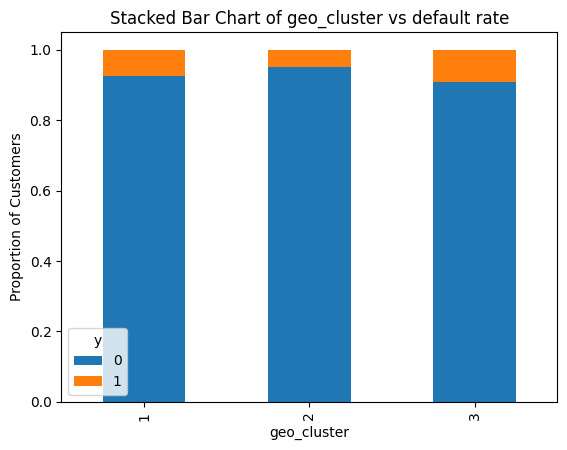

In [ ]:
data=df2

table=pd.crosstab(data.geo_cluster,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of geo_cluster vs default rate')
plt.xlabel('geo_cluster')
plt.ylabel('Proportion of Customers')
plt.savefig(path+'geo_clustervsdeaultrate')

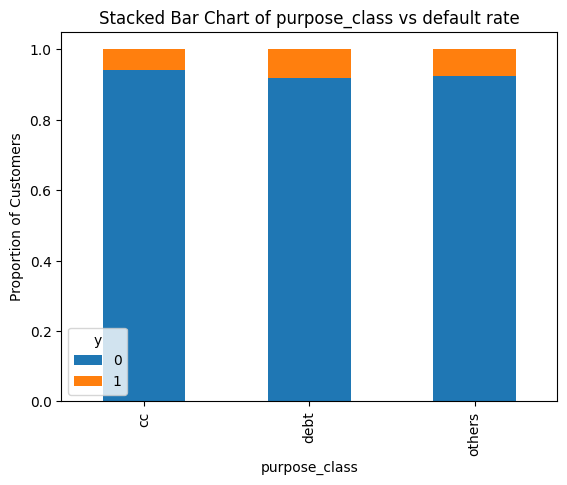

In [ ]:
table=pd.crosstab(data.purpose_class,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of purpose_class vs default rate')
plt.xlabel('purpose_class')
plt.ylabel('Proportion of Customers')
plt.savefig(path+'purpose_classvsdeaultrate')

### Lets explore the remaining variables

In [ ]:
cat_vars=[]
a=df2.dtypes
for k in a.iteritems():
  if k[-1]=='object' and 'issue_d' not in k[0]:
    cat_vars.append(k[0])
    print(k[-1])

cat_vars

object
object
object
object
object
object
object
object
object
object


<ipython-input-108-9f207eaa60e3>:3: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



['term',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_credit_pull_d',
 'purpose_class']

In [ ]:
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

#### Saving the input

In [ ]:
parquet_file_path = path+'outputs/datainput2.parquet'

# Write DataFrame to Parquet file
table = pa.Table.from_pandas(df2)
pq.write_table(table, parquet_file_path)

## Transforming the variables by WOE's

In [5]:
path='/content/drive/MyDrive/USA/NinjaHoldings/Assesment/'

In [6]:
import pandas as pd

# Specify the Parquet file path
parquet_file_path = path+'outputs/datainput2.parquet'

# Read Parquet file into pandas DataFrame
df = pd.read_parquet(parquet_file_path)

# Display the DataFrame
len(df),len(df.columns)

(76293, 39)

In [7]:
df.dtypes

id                                        int64
loan_amnt                                 int64
term                                     object
installment                             float64
emp_length                               object
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                                  object
loan_status                              object
purpose                                  object
addr_state                               object
dti                                     float64
earliest_cr_line                         object
fico_range_low                            int64
fico_range_high                           int64
last_credit_pull_d                       object
last_fico_range_high                      int64
last_fico_range_low                       int64
acc_now_delinq                            int64
delinq_amnt                             

In [8]:
# Display missing values for the specified variables
missing_values = df.isnull().sum()

# Print the result
missing_values

id                                   0
loan_amnt                            0
term                                 0
installment                          0
emp_length                           0
home_ownership                       0
annual_inc                           0
verification_status                  0
issue_d                              0
loan_status                          0
purpose                              0
addr_state                           0
dti                                  0
earliest_cr_line                     0
fico_range_low                       0
fico_range_high                      0
last_credit_pull_d                   0
last_fico_range_high                 0
last_fico_range_low                  0
acc_now_delinq                       0
delinq_amnt                          0
delinq_2yrs                          0
mths_since_last_delinq           36378
mths_since_last_record           62388
inq_last_6mths                       0
inq_last_12m             

#### Transform variables into woes to have the log odds scale for everyone

In [9]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [10]:
import pandas as pd
import numpy as np

def create_woe_iv_for_characteristics(df, characteristics, target_variable):
    IV_list = []
    WOE_list = []

    for characteristic in characteristics:
        # Create a cross-tabulation for the current characteristic
        crosstab = pd.crosstab(df[characteristic], df[target_variable], margins=True, margins_name='All')

        # Calculate % Good
        crosstab['p_good'] = crosstab[0] / crosstab[0].sum()

        # Calculate % Bad
        crosstab['p_bad'] = crosstab[1] / crosstab[1].sum()

        # Calculate the WOE
        crosstab['WOE'] = np.log(crosstab['p_good'] / crosstab['p_bad'])

        # Calculate the contribution value for IV
        crosstab['contribution'] = (crosstab['p_good'] - crosstab['p_bad']) * crosstab['WOE']

        # Calculate the IV
        IV = crosstab['contribution'].sum()

        add_IV = {'Characteristic': characteristic, 'Information Value': IV}

        WOE_list.append(crosstab)
        IV_list.append(add_IV)

    return IV_list, WOE_list


In [11]:
import pandas as pd
import numpy as np

def calculate_woe_iv(df, feature_col, target_col):
    crosstab = pd.crosstab(df[feature_col], df[target_col], normalize='index')

    # Calculate the global WOE
    global_woe = np.log(np.where(crosstab[1].sum() == 0, 0.0001, crosstab[0].sum() / crosstab[1].sum()))

    # Handle missing values
    if 1 not in crosstab.columns:
        crosstab[1] = 0

    # Calculate the WOE, handling division by zero
    crosstab['WOE'] = np.log(np.where(crosstab[1] == 0, 0.0001, crosstab[0] / crosstab[1]))

    # Replace -inf and inf with the global WOE
    crosstab['WOE'] = crosstab['WOE'].replace({-np.inf: global_woe, np.inf: global_woe})

    crosstab['IV'] = (crosstab[0] - crosstab[1]) * crosstab['WOE']
    return crosstab[['WOE', 'IV']].reset_index()




def categorical_to_woe(df, feature_col, target_col):
    if set(df[target_col]) != {0, 1}:
        raise ValueError(f"The target variable '{target_col}' must have binary values (0 and 1).")

    woe_iv_df = df.groupby(feature_col).apply(lambda x: calculate_woe_iv(x, feature_col, target_col))
    woe_iv_df = woe_iv_df.droplevel(1)  # Drop the duplicated characteristic index

    # Create a dictionary mapping categories to WOE values
    woe_mapping = dict(zip(woe_iv_df[feature_col], woe_iv_df['WOE']))
    json_filename = path+"outputs/"+feature_col+"_data.json"
    with open(json_filename, 'w') as json_file:
          json.dump(woe_mapping, json_file)

    # Replace the original categorical column with WOE values
    df[feature_col + '_WOE'] = df[feature_col].map(woe_mapping)

    return df




In [12]:
import pandas as pd
import numpy as np
import json

def calculate_woe_iv_continuous(df, feature_col, target_col, num_bins):
    # Handle missing values
    df[feature_col] = df[feature_col].fillna(df[feature_col].median())  # Replace missing values with the median

    # Create bins for the continuous variable using quantiles
    df[feature_col + '_bins'], bin_edges = pd.qcut(df[feature_col], q=num_bins, precision=2, retbins=True)

    # Calculate the global WOE
    total_good = df[df[target_col] == 0].shape[0]
    total_bad = df[df[target_col] == 1].shape[0]

    global_woe = np.log(np.where(total_bad == 0, 0.0001, total_good / total_bad))

    # Calculate WOE for each bin
    woe_iv_df = df.groupby(feature_col + '_bins')[target_col].agg(['count', 'sum'])
    woe_iv_df['p_good'] = (woe_iv_df['count'] - woe_iv_df['sum']) / total_good
    woe_iv_df['p_bad'] = woe_iv_df['sum'] / total_bad
    woe_iv_df['WOE'] = np.log(np.where(woe_iv_df['p_bad'] == 0, 0.0001, woe_iv_df['p_good'] / woe_iv_df['p_bad']))

    # Handle -inf and inf
    woe_iv_df['WOE'] = woe_iv_df['WOE'].replace({-np.inf: global_woe, np.inf: global_woe})

    # Create a dictionary mapping bins to WOE values
    woe_mapping = dict(zip(woe_iv_df.index, woe_iv_df['WOE']))

    # Replace the original continuous column with WOE values
    df[feature_col + '_WOE'] = df[feature_col + '_bins'].map(woe_mapping)
    #df[feature_col + '_bins'] = df['bins'].map(woe_mapping)

    return df

In [13]:
df1=df
print(df1.columns)

Index(['id', 'loan_amnt', 'term', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'acc_now_delinq',
       'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record', 'inq_last_6mths', 'inq_last_12m', 'Date',
       'earliest_cr_line_', 'last_credit_pull_d_', 'months_with_cn_loan',
       'months_since_earliest_cr_line', 'employment_length_ordinal', 'label',
       'y', 'Lat', 'Lon', 'defrte_geog', 'purpose_class', 'geograph_cluster'],
      dtype='object')


In [14]:
def cat_years(x):
  if x>9:
    label='sr'
  elif x<2:
    label='jr'
  else:
    label='mid'

  return label

df1['employment_years_cat']=df1['employment_length_ordinal'].apply(lambda x: cat_years(x))

In [15]:
df1.dtypes

id                                        int64
loan_amnt                                 int64
term                                     object
installment                             float64
emp_length                               object
home_ownership                           object
annual_inc                              float64
verification_status                      object
issue_d                                  object
loan_status                              object
purpose                                  object
addr_state                               object
dti                                     float64
earliest_cr_line                         object
fico_range_low                            int64
fico_range_high                           int64
last_credit_pull_d                       object
last_fico_range_high                      int64
last_fico_range_low                       int64
acc_now_delinq                            int64
delinq_amnt                             

In [16]:
# Assuming df1 is your DataFrame
object_columns = df1.select_dtypes(include=['object']).columns.tolist()

# Print or use the list of object variables
print(object_columns)


['term', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d', 'purpose_class', 'geograph_cluster', 'employment_years_cat']


In [17]:
len(object_columns)

13

In [18]:
for t in object_columns:
  if t in ['issue_d', 'loan_status','last_credit_pull_d','earliest_cr_line']:
    print(t)
  else:
    print(f"------{t}")

------term
------emp_length
------home_ownership
------verification_status
issue_d
loan_status
------purpose
------addr_state
earliest_cr_line
last_credit_pull_d
------purpose_class
------geograph_cluster
------employment_years_cat


In [19]:
for t in object_columns:
  if t in ['issue_d', 'loan_status','last_credit_pull_d','earliest_cr_line']:#purpose has a single pint class so is beter to use other option
    pass
  else:
    try:
      df1 = categorical_to_woe(df1, t, 'y')
    except Exception as e:
      print(f"Exception {e} ---- {t}")
# Display the DataFrame with the new WOE column
print("\nDataFrame with WOE column :")
df1.head(5)

Exception 1 ---- purpose

DataFrame with WOE column :


id  loan_amnt       term  installment emp_length home_ownership  \
0  88787390      30000  60 months       761.64    6 years           RENT   
1  67919555      16000  60 months       379.39    6 years           RENT   
2  54027458      14000  36 months       439.88    5 years           RENT   
3  72594974       7500  36 months       252.67    3 years       MORTGAGE   
4  74815224       2800  36 months        94.33   < 1 year           RENT   

   annual_inc verification_status   issue_d loan_status  ... geograph_cluster  \
0    100100.0            Verified  Sep-2016     Current  ...          MidRisk   
1     84000.0        Not Verified  Jan-2016     Current  ...          MidRisk   
2     50000.0     Source Verified  Jul-2015  Fully Paid  ...          MidRisk   
3     68000.0        Not Verified  Feb-2016  Fully Paid  ...          MidRisk   
4     25000.0     Source Verified  Mar-2016     Current  ...          LowRisk   

  employment_years_cat  term_WOE emp_length_WOE  home_ownership_WOE  \
0                  mid  2.194182       2.530314            2.362929   
1                  mid  2.194182       2.530314            2.362929   
2                  mid  2.671585       2.522647            2.362929   
3                  mid  2.671585       2.486511            2.639946   
4                   jr  2.671585       2.357103            2.362929   

   verification_status_WOE addr_state_WOE  purpose_class_WOE  \
0                 2.232915       2.733904           2.422965   
1                 2.894069       2.500146           2.422965   
2                 2.480700       2.674149           2.422965   
3                 2.894069       2.556732           2.422965   
4                 2.480700       3.026504           2.490468   

   geograph_cluster_WOE  employment_years_cat_WOE  
0              2.533445                  2.487256  
1              2.533445                  2.487256  
2              2.533445                  2.487256  
3              2.533445                  2.487256  
4              2.952684                  2.390828  

[5 rows x 48 columns]

In [ ]:
print(df1.columns)

Index(['id', 'loan_amnt', 'term', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'earliest_cr_line',
       'fico_range_low', 'fico_range_high', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low', 'acc_now_delinq',
       'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq',
       'mths_since_last_record', 'inq_last_6mths', 'inq_last_12m', 'Date',
       'earliest_cr_line_', 'last_credit_pull_d_', 'months_with_cn_loan',
       'months_since_earliest_cr_line', 'employment_length_ordinal', 'label',
       'y', 'Lat', 'Lon', 'defrte_geog', 'purpose_class', 'geograph_cluster',
       'employment_years_cat', 'term_WOE', 'emp_length_WOE',
       'home_ownership_WOE', 'verification_status_WOE', 'addr_state_WOE',
       'purpose_class_WOE', 'geograph_cluster_WOE',
       'employment_years_cat_WOE'],
      dtype='object')


In [20]:
woes=[x for x in df1.columns if 'WOE' in x]
woes

['term_WOE',
 'emp_length_WOE',
 'home_ownership_WOE',
 'verification_status_WOE',
 'addr_state_WOE',
 'purpose_class_WOE',
 'geograph_cluster_WOE',
 'employment_years_cat_WOE']

In [21]:
# Display missing values for the specified variables
missing_values = df1[woes].isnull().sum()

# Print the result
missing_values

term_WOE                    0
emp_length_WOE              0
home_ownership_WOE          0
verification_status_WOE     0
addr_state_WOE              0
purpose_class_WOE           0
geograph_cluster_WOE        0
employment_years_cat_WOE    0
dtype: int64

In [22]:
continuous_columns = df1.select_dtypes(exclude=['object']).columns.tolist()

# Print or use the list of object variables
print(continuous_columns)


['id', 'loan_amnt', 'installment', 'annual_inc', 'dti', 'fico_range_low', 'fico_range_high', 'last_fico_range_high', 'last_fico_range_low', 'acc_now_delinq', 'delinq_amnt', 'delinq_2yrs', 'mths_since_last_delinq', 'mths_since_last_record', 'inq_last_6mths', 'inq_last_12m', 'Date', 'earliest_cr_line_', 'last_credit_pull_d_', 'months_with_cn_loan', 'months_since_earliest_cr_line', 'employment_length_ordinal', 'label', 'y', 'Lat', 'Lon', 'defrte_geog', 'term_WOE', 'emp_length_WOE', 'home_ownership_WOE', 'verification_status_WOE', 'addr_state_WOE', 'purpose_class_WOE', 'geograph_cluster_WOE', 'employment_years_cat_WOE']


In [32]:
continuous = [x for x in continuous_columns if x not in ['id','y','label','Date','installment'
                                                    'earliest_cr_line_','last_credit_pull_d_','months_with_cn_loan','label','y','Lat','Lon','defrte_geog'] and 'WOE' not in x]

In [33]:
'inq_last_12m' in continuous

True

In [34]:
df1[continuous].dtypes

loan_amnt                                 int64
installment                             float64
annual_inc                              float64
dti                                     float64
fico_range_low                            int64
fico_range_high                           int64
last_fico_range_high                      int64
last_fico_range_low                       int64
acc_now_delinq                            int64
delinq_amnt                               int64
delinq_2yrs                               int64
mths_since_last_delinq                  float64
mths_since_last_record                  float64
inq_last_6mths                            int64
inq_last_12m                            float64
earliest_cr_line_                datetime64[ns]
months_since_earliest_cr_line             int64
employment_length_ordinal                 int64
dtype: object

In [35]:
import json

def to_save_dictio(dictio):
    # Assuming dictio is a dictionary with group names as keys and data as values
    for group_name, group_data in dictio.items():
        # Create a JSON filename based on the group name
        json_filename = path+"outputs/"+group_name+"_data.json"

        # Write the group data to the JSON file
        with open(json_filename, 'w') as json_file:
            json.dump(group_data.to_dict(), json_file)

        print(f"JSON file '{json_filename}' created.")


In [36]:
test=df1

for x in test.columns:
  if 'WOE' in x:
    test[x]=test[x].apply(lambda x: float(x))

In [37]:
import logging

exceptions = []

for x in continuous:
    n = 10

    if 'employment' in x:
        n = 3
    elif 'inq' in x or 'delinq' in x:
        n = 2

    try:
        test = calculate_woe_iv_continuous(test, x, 'y', n)
        test[x + '_WOE'] = test[x + '_WOE'].astype(float)

        # Convert Interval data to a format serializable to JSON
        test[x + '_bins'] = test[x + '_bins'].apply(lambda interval: f"{interval.left}-{interval.right}")

        dictio = test.groupby(x + '_bins')[x + '_WOE'].mean().reset_index()
        to_save_dictio(dictio)

        # Display the DataFrame with the new WOE column
        print(f"\nDataFrame with WOE column for '{x}':")
        print(test[[x, x + '_WOE', x + '_bins']].head(5))
    except Exception as e:
        print(f"Skipping this one {x} === {e}")
        exceptions.append(x)


JSON file '/content/drive/MyDrive/USA/NinjaHoldings/Assesment/outputs/loan_amnt_bins_data.json' created.
JSON file '/content/drive/MyDrive/USA/NinjaHoldings/Assesment/outputs/loan_amnt_WOE_data.json' created.

DataFrame with WOE column for 'loan_amnt':
   loan_amnt  loan_amnt_WOE   loan_amnt_bins
0      30000      -0.194031  28000.0-40000.0
1      16000      -0.141337  15600.0-19200.0
2      14000       0.008515  13500.0-15600.0
3       7500       0.080903   7260.0-10000.0
4       2800       0.209392    999.99-5000.0
JSON file '/content/drive/MyDrive/USA/NinjaHoldings/Assesment/outputs/installment_bins_data.json' created.
JSON file '/content/drive/MyDrive/USA/NinjaHoldings/Assesment/outputs/installment_WOE_data.json' created.

DataFrame with WOE column for 'installment':
   installment  installment_WOE installment_bins
0       761.64        -0.076293    637.36-790.82
1       379.39        -0.102815    329.91-382.55
2       439.88        -0.106182    382.55-459.67
3       252.67        

In [46]:
exceptions

['acc_now_delinq',
 'delinq_amnt',
 'delinq_2yrs',
 'mths_since_last_record',
 'inq_last_6mths',
 'employment_length_ordinal']

In [39]:
#inq_last_12m
for x in test.columns:
  if 'inq_last_12m' in x:
    print(x)

inq_last_12m
inq_last_12m_bins
inq_last_12m_WOE


In [40]:
test.head(2)

id  loan_amnt       term  installment emp_length home_ownership  \
0  88787390      30000  60 months       761.64    6 years           RENT   
1  67919555      16000  60 months       379.39    6 years           RENT   

   annual_inc verification_status   issue_d loan_status  ...  \
0    100100.0            Verified  Sep-2016     Current  ...   
1     84000.0        Not Verified  Jan-2016     Current  ...   

  mths_since_last_delinq_bins mths_since_last_delinq_WOE  \
0                  -0.01-31.0                   0.008134   
1                  31.0-146.0                  -0.023232   

   months_since_earliest_cr_line_bins months_since_earliest_cr_line_WOE  \
0                         326.0-852.0                          0.299529   
1                         202.0-230.0                          0.087179   

   installment_bins  installment_WOE inq_last_12m_bins  inq_last_12m_WOE  \
0     637.36-790.82        -0.076293         -0.01-1.0         -0.096891   
1     329.91-382.55        -0.102815          1.0-36.0          0.395002   

                              earliest_cr_line__bins  earliest_cr_line__WOE  
0  1943-12-31 23:59:59.999999999-1988-08-01 00:00:00               0.226550  
1            1996-09-01 00:00:00-1998-12-01 00:00:00               0.040425  

[2 rows x 72 columns]

In [41]:
woes=[x for x in test.columns if 'WOE' in x]

missing_values = test[woes].isnull().sum()

# Print the result
missing_values

term_WOE                             0
emp_length_WOE                       0
home_ownership_WOE                   0
verification_status_WOE              0
addr_state_WOE                       0
purpose_class_WOE                    0
geograph_cluster_WOE                 0
employment_years_cat_WOE             0
loan_amnt_WOE                        0
annual_inc_WOE                       0
dti_WOE                              0
fico_range_low_WOE                   0
fico_range_high_WOE                  0
last_fico_range_high_WOE             0
last_fico_range_low_WOE              0
mths_since_last_delinq_WOE           0
months_since_earliest_cr_line_WOE    0
installment_WOE                      0
inq_last_12m_WOE                     0
earliest_cr_line__WOE                0
dtype: int64

In [42]:
test[woes].dtypes

term_WOE                             float64
emp_length_WOE                       float64
home_ownership_WOE                   float64
verification_status_WOE              float64
addr_state_WOE                       float64
purpose_class_WOE                    float64
geograph_cluster_WOE                 float64
employment_years_cat_WOE             float64
loan_amnt_WOE                        float64
annual_inc_WOE                       float64
dti_WOE                              float64
fico_range_low_WOE                   float64
fico_range_high_WOE                  float64
last_fico_range_high_WOE             float64
last_fico_range_low_WOE              float64
mths_since_last_delinq_WOE           float64
months_since_earliest_cr_line_WOE    float64
installment_WOE                      float64
inq_last_12m_WOE                     float64
earliest_cr_line__WOE                float64
dtype: object

### The WoE variables are the following

In [43]:
#Variable selection for the model in scale WoE

vars_woes=['y']+list(woes)
vars_woes

['y',
 'term_WOE',
 'emp_length_WOE',
 'home_ownership_WOE',
 'verification_status_WOE',
 'addr_state_WOE',
 'purpose_class_WOE',
 'geograph_cluster_WOE',
 'employment_years_cat_WOE',
 'loan_amnt_WOE',
 'annual_inc_WOE',
 'dti_WOE',
 'fico_range_low_WOE',
 'fico_range_high_WOE',
 'last_fico_range_high_WOE',
 'last_fico_range_low_WOE',
 'mths_since_last_delinq_WOE',
 'months_since_earliest_cr_line_WOE',
 'installment_WOE',
 'inq_last_12m_WOE',
 'earliest_cr_line__WOE']

In [44]:
pip install --upgrade pyarrow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [47]:
for x in test.columns:
  if 'bin' in x:
    test[x] = test[x].astype(str)


In [48]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq

# Assuming 'test' is your DataFrame with categorical columns containing intervals
# Convert categorical columns to strings


# Write DataFrame to Parquet file
table = pa.Table.from_pandas(test)
parquet_file_path = path+'outputs/datainput4.parquet'
pq.write_table(table, parquet_file_path)


### The input is ready

In [49]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
parquet_file_path = path+'outputs/datainput4.parquet'

table = pq.read_table(parquet_file_path)

# Convert the PyArrow Table to a Pandas DataFrame
df = table.to_pandas()
df.head(5)

id  loan_amnt       term  installment emp_length home_ownership  \
0  88787390      30000  60 months       761.64    6 years           RENT   
1  67919555      16000  60 months       379.39    6 years           RENT   
2  54027458      14000  36 months       439.88    5 years           RENT   
3  72594974       7500  36 months       252.67    3 years       MORTGAGE   
4  74815224       2800  36 months        94.33   < 1 year           RENT   

   annual_inc verification_status   issue_d loan_status  ...  \
0    100100.0            Verified  Sep-2016     Current  ...   
1     84000.0        Not Verified  Jan-2016     Current  ...   
2     50000.0     Source Verified  Jul-2015  Fully Paid  ...   
3     68000.0        Not Verified  Feb-2016  Fully Paid  ...   
4     25000.0     Source Verified  Mar-2016     Current  ...   

  mths_since_last_delinq_bins mths_since_last_delinq_WOE  \
0                  -0.01-31.0                   0.008134   
1                  31.0-146.0                  -0.023232   
2                  -0.01-31.0                   0.008134   
3                  -0.01-31.0                   0.008134   
4                  -0.01-31.0                   0.008134   

   months_since_earliest_cr_line_bins months_since_earliest_cr_line_WOE  \
0                         326.0-852.0                          0.299529   
1                         202.0-230.0                          0.087179   
2                         202.0-230.0                          0.087179   
3                         181.0-202.0                          0.092982   
4                         104.0-128.0                         -0.155413   

   installment_bins  installment_WOE inq_last_12m_bins  inq_last_12m_WOE  \
0     637.36-790.82        -0.076293         -0.01-1.0         -0.096891   
1     329.91-382.55        -0.102815          1.0-36.0          0.395002   
2     382.55-459.67        -0.106182         -0.01-1.0         -0.096891   
3     235.61-285.14         0.062403          1.0-36.0          0.395002   
4      30.11-166.77         0.342067         -0.01-1.0         -0.096891   

                              earliest_cr_line__bins  earliest_cr_line__WOE  
0  1943-12-31 23:59:59.999999999-1988-08-01 00:00:00               0.226550  
1            1996-09-01 00:00:00-1998-12-01 00:00:00               0.040425  
2            1996-09-01 00:00:00-1998-12-01 00:00:00               0.040425  
3            2000-09-01 00:00:00-2002-03-01 00:00:00              -0.088931  
4            2005-03-01 00:00:00-2007-03-01 00:00:00              -0.091597  

[5 rows x 72 columns]

In [51]:

# Convert the PyArrow Table to a Pandas DataFrame
df.to_csv(path+'outputs/final_database_formodel.csv')

In [50]:
len(df)

76293

## END Data base constuction